## WorkFlow of Scikit-learn

1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluate a model
5. Improve a model
6. Save and load a trained model

In [2]:
# 1. Get the data Ready

In [3]:
import numpy as np
import pandas as pd

In [4]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# Creating x (feature variables)
x = heart_disease.drop("target", axis = 1)

# Creating y (target variable)
y = heart_disease["target"]

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# 3. Fit the model on training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [30]:
# Making the predictions
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [31]:
# Evalutaing the model

clf.score(x_train, y_train)

1.0

In [32]:
clf.score(x_test, y_test)

0.8688524590163934

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[24  5]
 [ 3 29]]
0.8688524590163934


In [35]:
# Improving the Model

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Calculating the accuracy for {i} parameter")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train, y_train)
    print(f"accuracy of {i} parameter is {clf.score(x_test, y_test)} %")
    print("")

Calculating the accuracy for 10 parameter
accuracy of 10 parameter is 0.8524590163934426 %

Calculating the accuracy for 20 parameter
accuracy of 20 parameter is 0.8032786885245902 %

Calculating the accuracy for 30 parameter
accuracy of 30 parameter is 0.8360655737704918 %

Calculating the accuracy for 40 parameter
accuracy of 40 parameter is 0.8032786885245902 %

Calculating the accuracy for 50 parameter
accuracy of 50 parameter is 0.8688524590163934 %

Calculating the accuracy for 60 parameter
accuracy of 60 parameter is 0.8360655737704918 %

Calculating the accuracy for 70 parameter
accuracy of 70 parameter is 0.8360655737704918 %

Calculating the accuracy for 80 parameter
accuracy of 80 parameter is 0.8360655737704918 %

Calculating the accuracy for 90 parameter
accuracy of 90 parameter is 0.819672131147541 %



In [36]:
# saving the model
import pickle

pickle.dump(clf, open("random_forest_model.pkl", "wb"))

In [37]:
# Loading the model
loaded_model = pickle.load(open("random_forest_model.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.819672131147541

## How to debug warning 

In [42]:
#import warnings
#warnings.filterwarnings("ignore")

## Getting the Data ready

Three main things we do is:

    1. Split the data into features and target variable(x and y)
    2. Filling the ( also called imputing) or disregarding missing values
    3. Converting non numeric values to neumeric values(also called feature encoding)

In [44]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
# 1 Split
x = heart_disease.drop("target")

KeyError: "['target'] not found in axis"

In [50]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [51]:
y = heart_disease["target"]

y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [52]:
# Splitting into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [54]:
# Make sure everything is numeric
import pandas as pd
car_sales = pd.read_csv("car-sales-extended.csv")


In [55]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [56]:
x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_train, y_train)

ValueError: could not convert string to float: 'Honda'

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", 
                                  One_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

transformed_X = transformer.fit_transform(x)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [61]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [64]:
# Second method is .get_dummies
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [66]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

model.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
model.score(x_train, y_train)

0.891612713353635

In [68]:
model.score(x_test, y_test)

0.3235867221569877

## Handeling Missing data

1. Fill them with some value(also known as imputation)
2. Remove the sample with missing data altogether

In [69]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [70]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [71]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

### Option 1: Fill Missing data with Pandas

In [80]:
car_sales_missing["Make"].fillna(value = "missing", inplace = True)
car_sales_missing["Colour"].fillna(value = "missing", inplace = True)
car_sales_missing["Odometer (KM)"].fillna(value = car_sales_missing["Odometer (KM)"].mean(), inplace = True)
car_sales_missing["Doors"].fillna(value = 4, inplace = True)

In [81]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

### Remove the Rows with missing Price value

In [82]:
car_sales_missing.dropna(inplace = True)

In [83]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [84]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", 
                                  One_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(950, 16))

In [87]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill missing values using Scikit-Learn

In [89]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [91]:
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [92]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [95]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Filling categorical values with 'missing' and numeric with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value='missing')
door_imputer = SimpleImputer(strategy = "constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Defining columns
cat_feature = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

#Creating an imputer (to fill the missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_feature),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

#Transform the Data
filled_x = imputer.fit_transform(x)

In [96]:
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [97]:
car_sales_filled = pd.DataFrame(filled_x, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

In [98]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", 
                                  One_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [103]:
# We can split and fit a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_X, y)

model = RandomForestRegressor(n_estimators=50)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21642595114447094

# Choosing the Right Model/Algorithm 

Some things to remember

    1. Sklearn refers to machine learning model, algorithms as estimators
    2. Classification problem - predicting a category (Disease yes or no)
        * Sometimes we might see 'clf' (short form for classifier used as varible name for model)
    3. Regression problem - Predicting a future value(stock market prediction)

### ML Model for Regression Model

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing  = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [2]:
housing_df = pd.DataFrame(housing["data"], columns  = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
housing_df["MedHouseVal"] = housing["target"]

In [4]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
del housing_df["MedHouseVal"]

In [6]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
housing_df["target"] = housing["target"]

In [8]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Creating the feature and target variables
x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Spliting the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Fit the model 
model = Ridge()
model.fit(x_train, y_train)

# See the accuracy 
model.score(x_test, y_test)

0.5758549611440126

Ensemble Model is combination of small model combined to form a more better model

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [11]:
np.random.seed(42)

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]




In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)




RandomForestRegressor()

In [13]:
model.score(x_test, y_test)




0.806652667101436

### ML Model for Classification Model

In [ ]:
heart_disease = pd.read_csv("Data/heart-disease.csv")

In [15]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = LinearSVC()
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8688524590163934

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

## Tips

    1. If you have structured data using ensemble is best
    2. If you have unstructured data using deep learning or transfer learning is best

### Predicting Using trained model

    1. Using predict()
    2. Using predict_proba()

In [17]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [18]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [19]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [20]:
y_pred = clf.predict(x_test)
np.mean(y_pred == y_test)

np.float64(0.8524590163934426)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8524590163934426

#### Using Predict_proba()

Returns the probability estimates of all the class labels(Yes or No probablility)

In [22]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

 ### Evaluating the Model

    1. Accuracy 
    2. Area Under the Roc curve
    3. Confusion Matrix
    4. Classification Report

#### Accuracy

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, x, y)

print(f'Accruacy using Cross Validation is {np.mean(cross_val_score) *100:.2f}% ')

Accruacy using Cross Validation is 81.83% 


#### Area under ROC(Receiver operating Characteristics)



In [29]:
from sklearn.metrics import roc_curve

x_trian, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.8 , 0.2 ],
       [0.27, 0.73],
       [0.43, 0.57],
       [0.71, 0.29],
       [0.81, 0.19],
       [0.85, 0.15],
       [0.22, 0.78],
       [0.13, 0.87],
       [0.18, 0.82],
       [0.21, 0.79]])

In [30]:
y_probs_pos  = y_probs[:, 1]

In [31]:
# Calculating fpr, tpr and threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_pos)

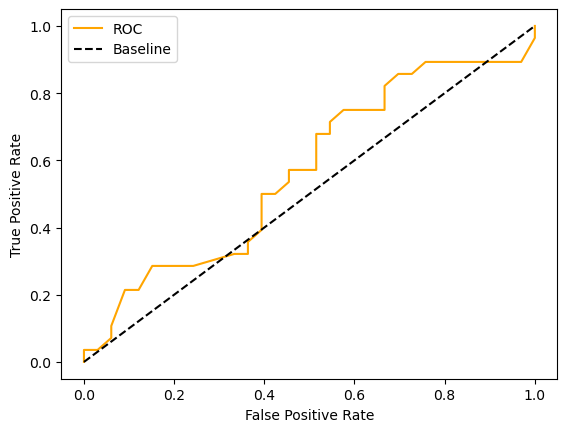

In [35]:
import matplotlib.pyplot as plt

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, color = "orange", label = "ROC")

    #Ideal Scenario 
    plt.plot([0, 1], [0, 1], color = "Black", linestyle = "--", label = "Baseline")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

plot_roc(fpr, tpr)
    

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_pos)

np.float64(0.5681818181818182)

#### Confusion Matix

In [40]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[16, 17],
       [ 9, 19]])

<Axes: >

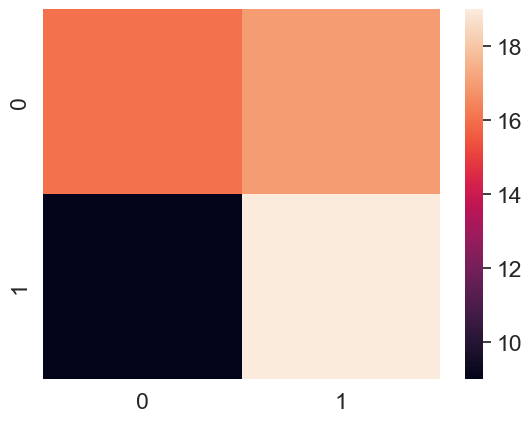

In [41]:
import seaborn as sns

sns.set(font_scale = 1.5)

conf = confusion_matrix(y_test, y_preds)

sns.heatmap(conf)

## Regression model evaluation metrics

    1. R^2 (coefficient of determination)
    2. Mean Absolute Error (MAE)
    3. Mean Squared Error (MSE)

## 5. Imporving a model
First prediction = baseline prediction
First Model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more the data, the better)
* Could we improve our data?

From a model perspective
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameter vs Parameter
* Parameter - Model find these pattern in data
* Hyperparameter - Settings on a model you can adjust to improve its ability to find these patterns

Three ways to adjsut the hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GrindSearchCV

In [2]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [3]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy(y_test, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 3)}

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")

    return mertic_dict
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac = 1)

x = hear_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled['target']

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]


### Hyperparameter tuning with RandomsizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {
    "n_estimators" : [10, 100, 200, 500, 1000, 1200], 
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_sample_split": [2,4, 6],
    "min_sample_split": [1, 2, 4]
}

np.random.seed(42)

x = hear_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributor = grid,
                            n_iter = 10, # No of models to try
                            cv = 5,
                            verbose = 2)

# Fit the randomizedSearchCV model
rs_clf.fit(x_train, y_train)

In [ ]:
rs_clf.best_params_

### Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

grid = {
    "n_estimators" : [10, 100, 200, 500, 1000, 1200], 
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_sample_split": [2,4, 6],
    "min_sample_split": [1, 2, 4]
}

np.random.seed(42)

x = hear_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributor = grid,
                            cv = 5,
                            verbose = 2)

# Fit the randomizedSearchCV model
rs_clf.fit(x_train, y_train)

In [ ]:
rs_clf.best_params_

## 6. Saving and Loading Models

Two ways to do this
1. Pythons 'pickle' module
2. With 'joblib' module

In [ ]:
import pickle 

#Storing the model
pickle.dump(gs_clf,  open("gs_random_classifier.pkl", "wb"))

In [ ]:
#Loading the model for using it
loaded_pickle_model = pickle.load(open("gs_random_classifier.pkl"), "rb")

#### Joblib

In [ ]:
from joblib import dump, load

dump(gs_clf, filename = "gs_random_classifier.joblib")

In [ ]:
#Loading the model
loaded_joblib_model = laod(filename = "gs_random_classifier.joblib")